# Visual Data Analysis

Visualizing the telecom churn dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## A. Univariate Visualization

Univariate visualization visualizes one feature at a time. This is particularly useful to see the value distribution of that feature.

### 1. Quantitative features

#### Histogram and Density Plot

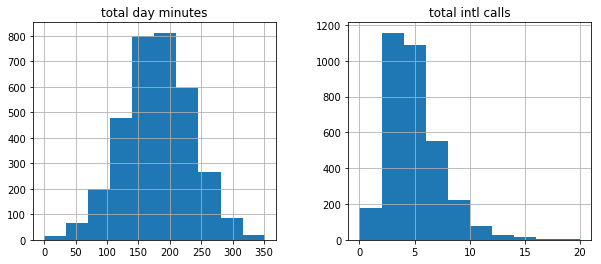

In [6]:
f = ['total day minutes', 'total intl calls']
df[f].hist(figsize=(10,4));

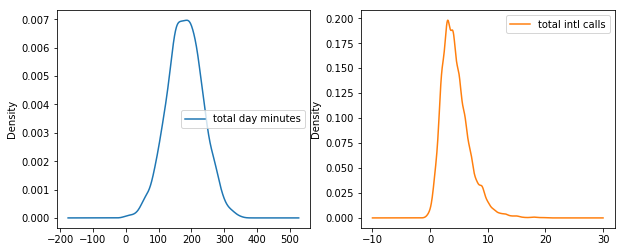

In [13]:
df[f].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10, 4));

Using seaborn distplot to display both histogram and density plot

C:\Users\AJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


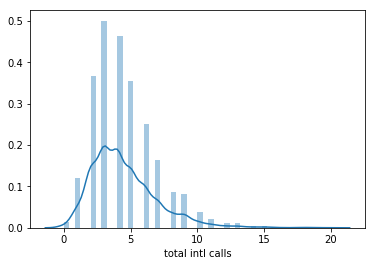

In [18]:
sns.distplot(df['total intl calls']);

#### Box plot

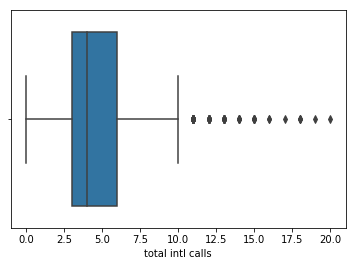

In [19]:
sns.boxplot(x='total intl calls', data=df)

#### Violin plot

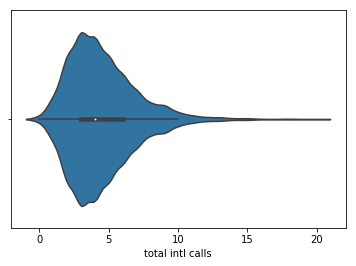

In [39]:
sns.violinplot(x='total intl calls', data=df, orient='h')

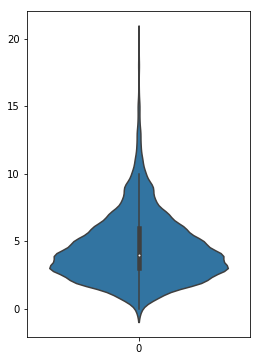

In [45]:
plt.figure(figsize=(4,6))
sns.violinplot(data=df['total intl calls'])

Box plot and violin plot comparison

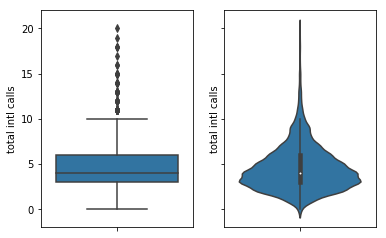

In [51]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot('total intl calls', data=df, ax=ax[0], orient='v')
sns.violinplot('total intl calls', data=df, ax=ax[1], orient='v')

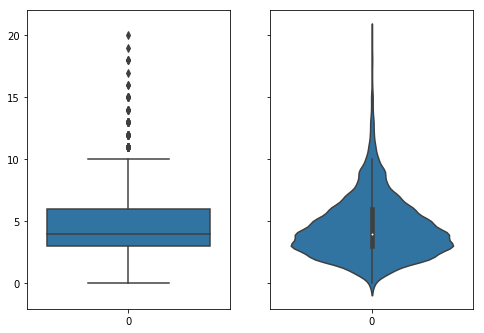

In [57]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,5.5))
sns.boxplot(data=df['total intl calls'], ax=ax[0])
sns.violinplot(data=df['total intl calls'], ax=ax[1])

### 2. Categorical and binary features

#### Bar plot

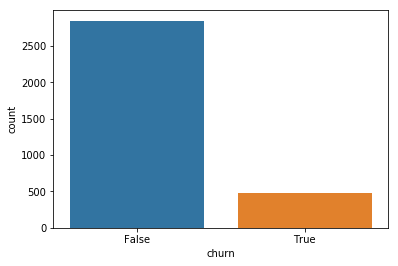

In [64]:
# sns.countplot
sns.countplot(x='churn', data=df)

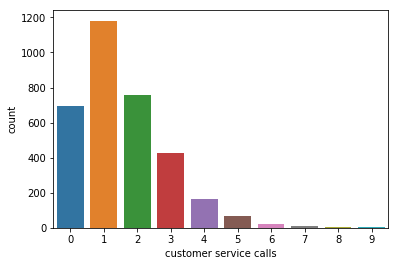

In [68]:
sns.countplot(x='customer service calls', data=df)

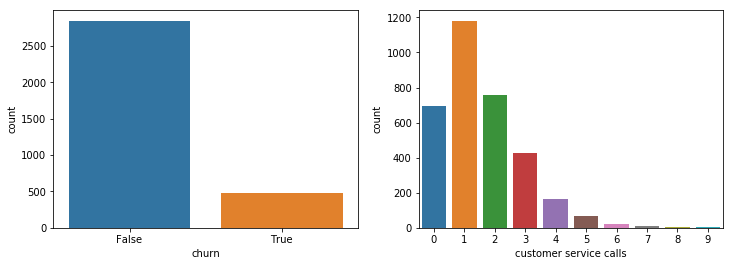

In [69]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x='churn', data=df, ax=ax[0])
sns.countplot(x='customer service calls', data=df, ax=ax[1])

Notes:
    1. Histograms are better suited for numerical variables.
    2. The value of the x-axis in histogram are numerical, whereas the box plot can accept 
    non-numerical values.

## B. Multivariate visualization

### 1. Quantitative vs Quantitative

#### Correlation matrix

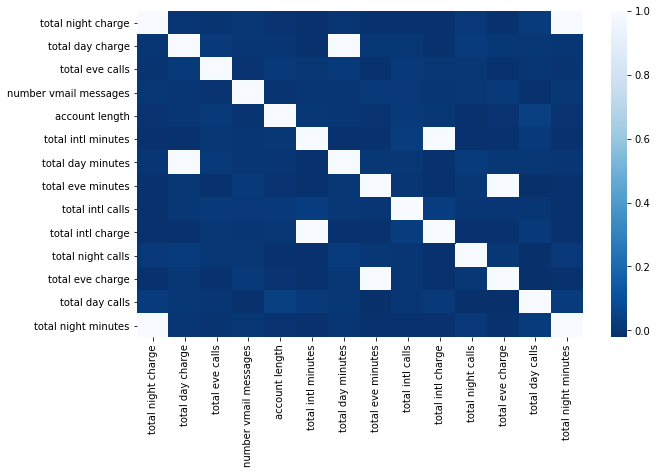

In [80]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
plt.figure(figsize=(10,6))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, cmap='Blues_r');

Note: there are dependent variables that do not contribute to our prediction to churn rate, so we could remove them.

In [81]:
numerical = list(set(numerical) - set(['total day charge', 'total intl minutes', 'total eve minutes', 'total night charge']))

In [85]:
numerical

['phone number',
 'total eve calls',
 'number vmail messages',
 'account length',
 'total day minutes',
 'total intl calls',
 'total intl charge',
 'total night calls',
 'total eve charge',
 'total day calls',
 'total night minutes']

#### Scatter plot 

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space.

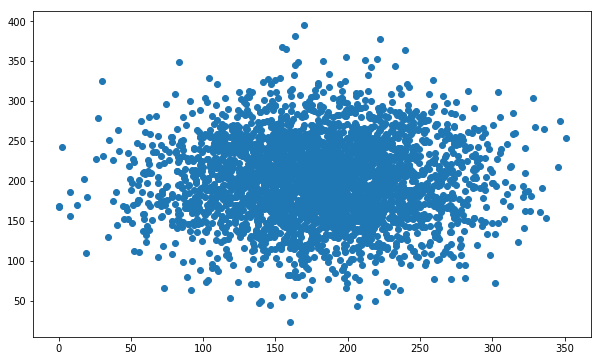

In [100]:
# ploting total day minutes and total night minutes
plt.figure(figsize=(10,6))
plt.scatter(df['total day minutes'], df['total night minutes']);

Not the most interpretable visual now, is it? Here's an alternative:

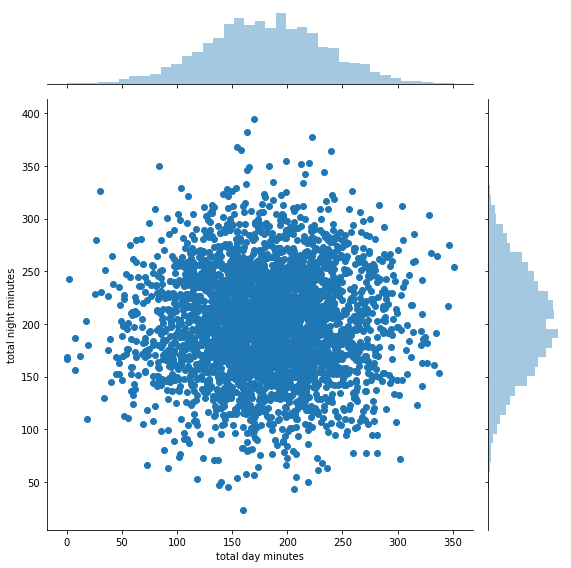

In [121]:
# jointplot
sns.jointplot('total day minutes', 'total night minutes', data=df, kind='scatter', height=8)

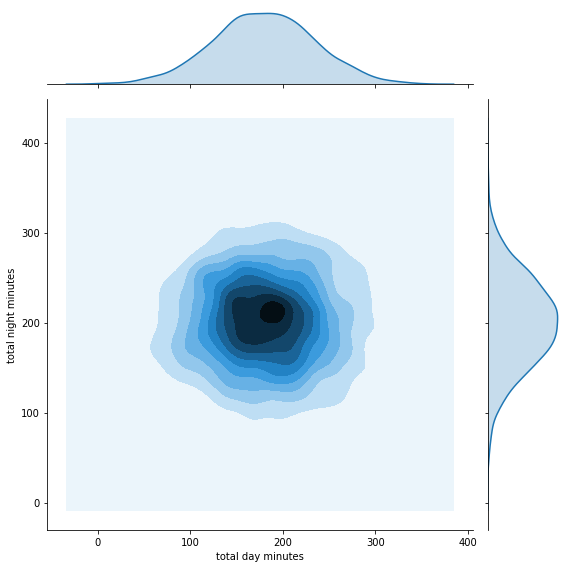

In [94]:
# jointplot kde
sns.jointplot('total day minutes', 'total night minutes', data=df, kind='kde', height=8)

#### Scatterplot matrix

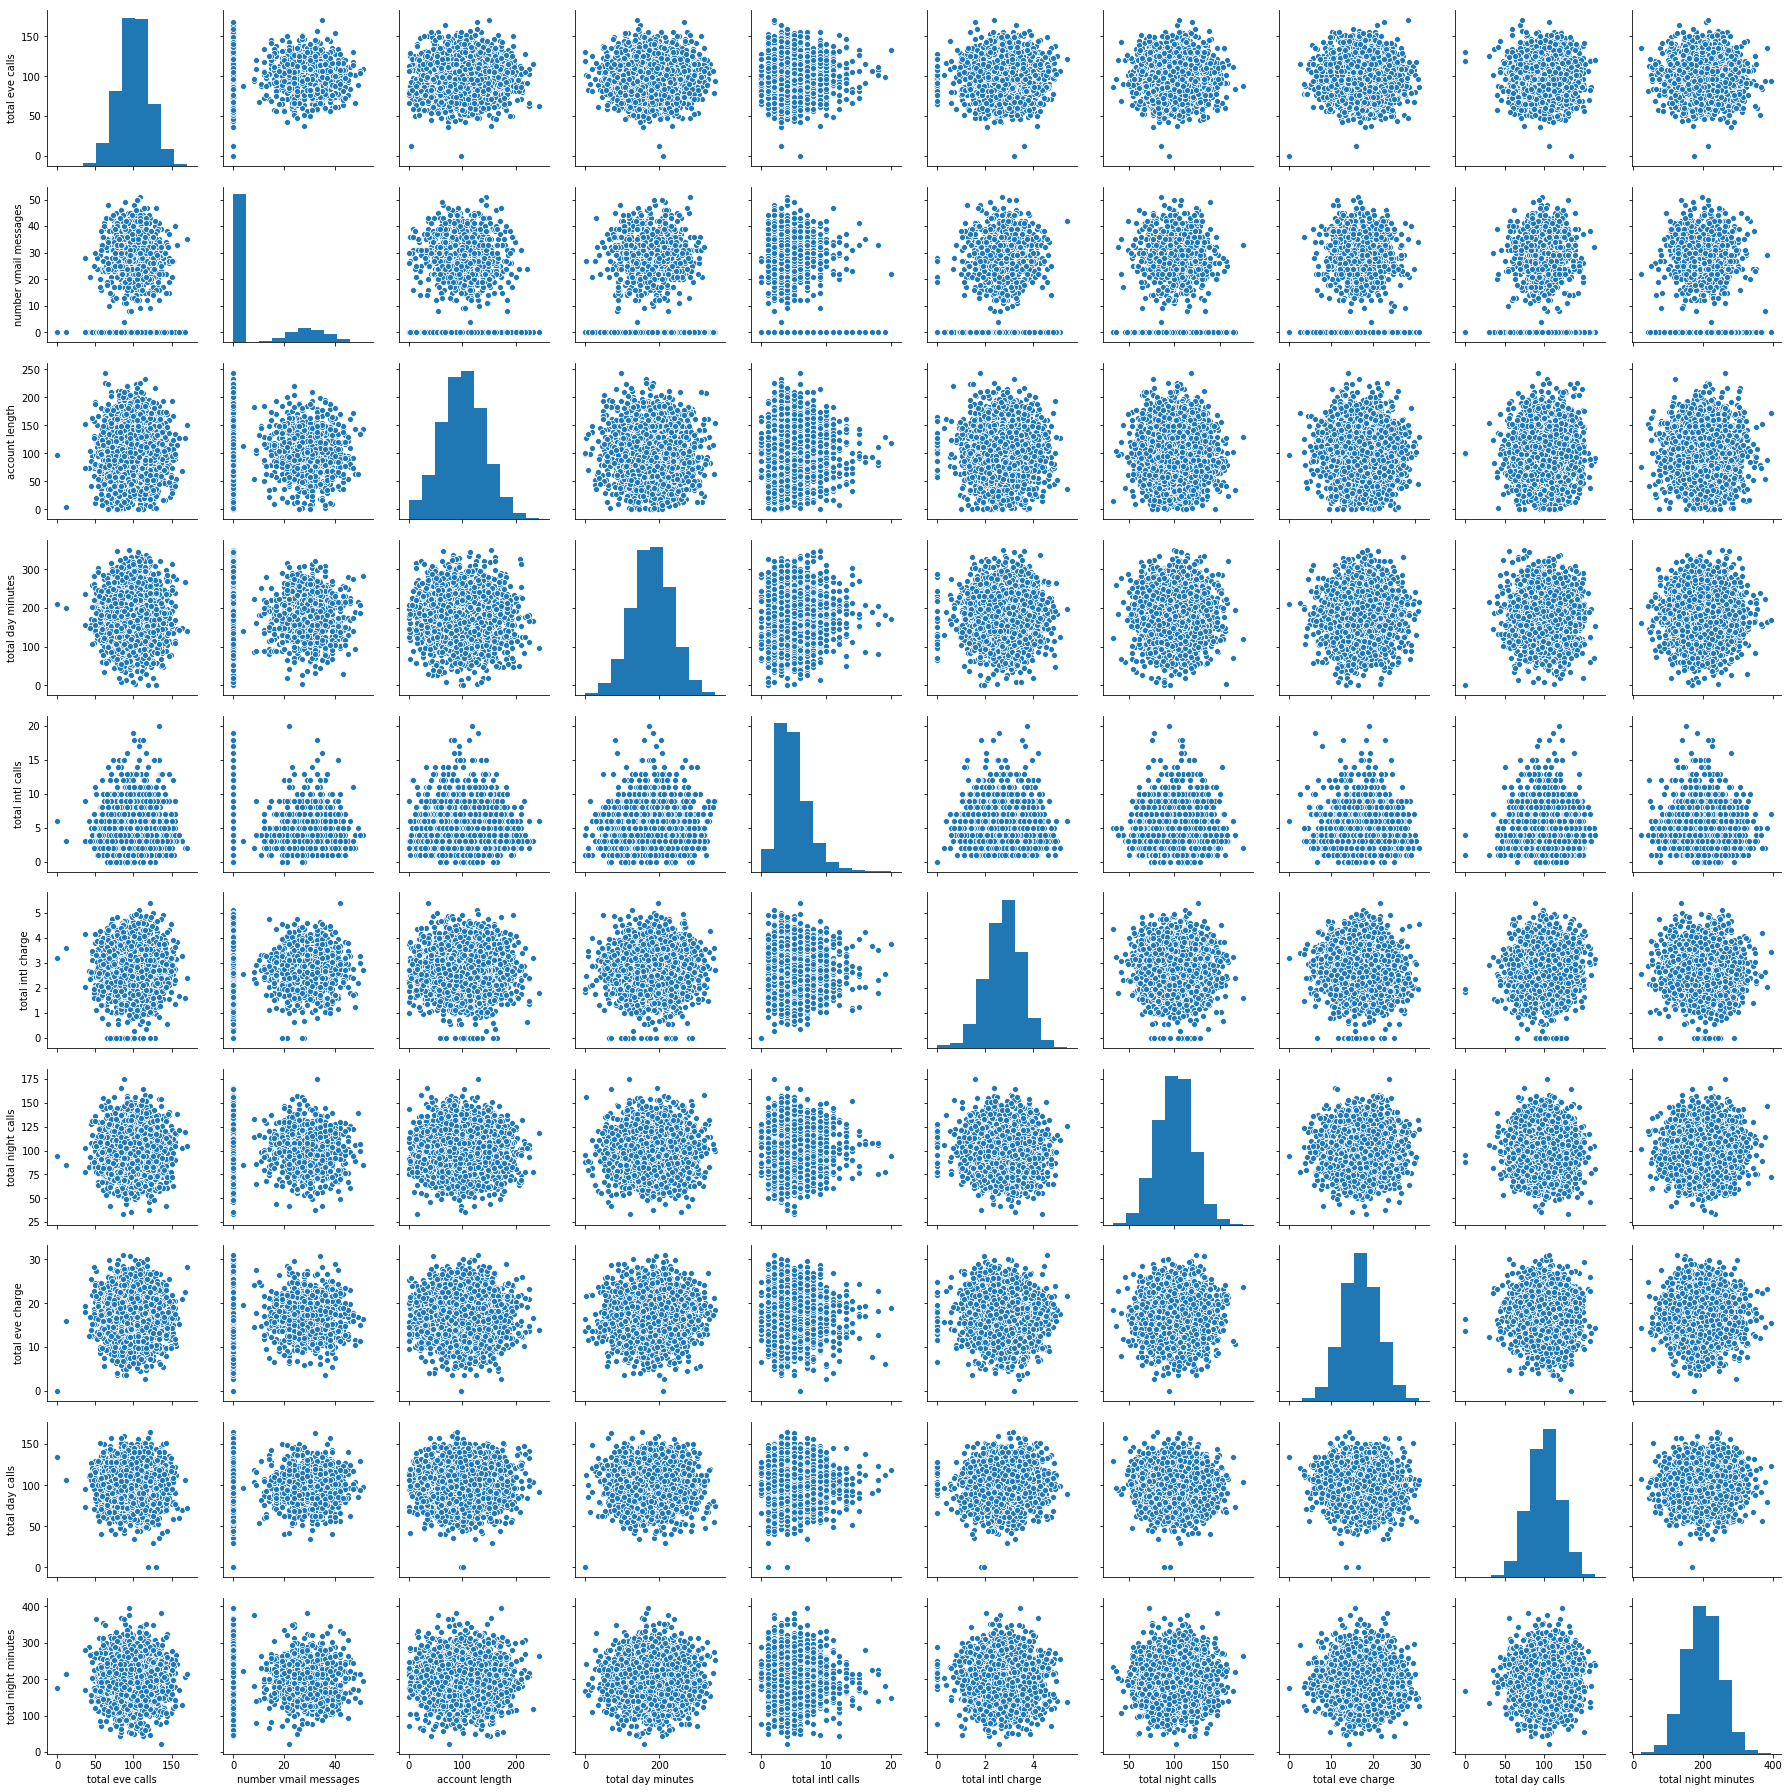

In [118]:
# pairplot
sns.pairplot(df[numerical])

### Quantitative vs Categorical

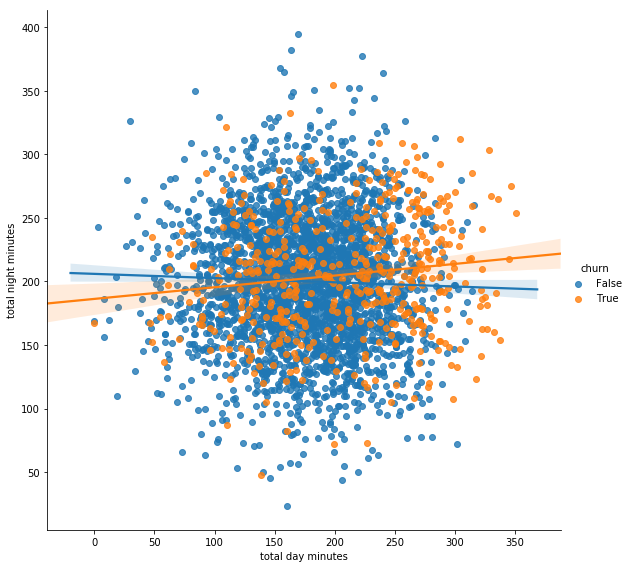

In [114]:
# using lmplot to plot both categorical and quantitative variable and their realtion to churn
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=True, height=8)

In [110]:
df['total day minutes'].max()

350.8

In [111]:
df['total night minutes'].max()

395.0

### Categorical vs Categorical

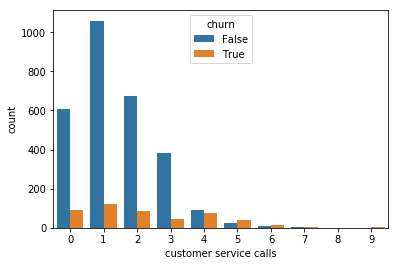

In [124]:
sns.countplot(x='customer service calls', hue='churn', data=df);

Note here that the churn rate increases after 4 customer calls...

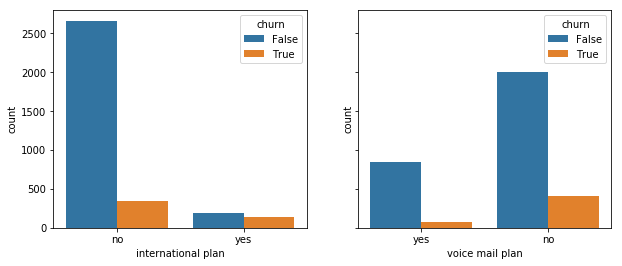

In [127]:
# let's check te relaionshi between churn and the bnar features (international plan and voice mail plan)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,4))
sns.countplot(x='international plan', hue='churn', data=df, ax=ax[0])
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=ax[1])

turns out that he effect of international plan o churn is more prevalent

#### Contingency table

contingency table shows multivariate frequency distribution of categorical variables in tabular form. In particular it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

In [130]:
# state and churn ccrrelation uisng contingenc table
pd.crosstab(df['state'], df['churn']).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [137]:
# calculating the churn rate for each state
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


# C. Whole dataset visualization

#### A naive approach:

uisng hist() or pairplot() like demonstrated above. However, there's limits to using the two, mainly when the number of features is high enough. Also, the method analyzes the data in pairwise fashion, not all at once.

#### Dimensionality reduction

Most real-world datasets have so many features that made it difficult to do entire visualization. Dimensionality reduction aims to decrease the number of dimensions in visualization without losing much information about the data. Among dimensionality reduction methods are Principal Component Analysis (PCA) which uses linear method and t-SNE (<i>t-distributed Stochastic Neighbor Embedding)</i> which uses non-linear methods.

#### t-SNE

In a nutshell, t-SNE aims to find a projection for a high dimensional feature space onto a plane (or a 3D hyperplane), such that points in the initial n-dimensional space will end up in equal proximity in the 2D/3D plane. <i>Neighbor embedding</i>  is a seach for a new and less-dimensional data representation that preserves neighborship of examples.

In [138]:
# import libs
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [139]:
# dropping state and churn
X = df.drop(['churn', 'state'], axis=1)
# mapping new values to binary features
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

In [149]:
X.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [155]:
X = X.drop(columns='phone number', axis=1)

In [156]:
# normalize data using StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [157]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [159]:
# Build a t-SNE representation for X
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

UsageError: Line magic function `%%time` not found.


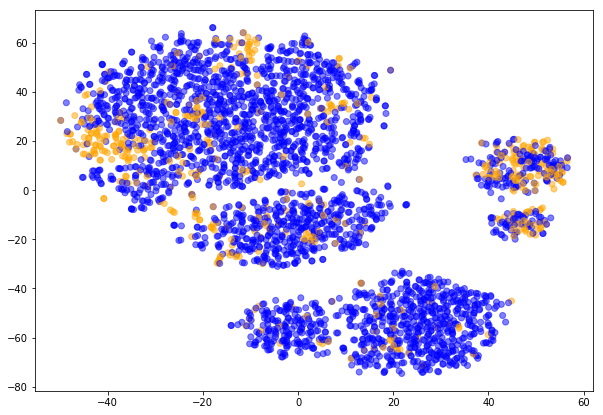

In [166]:
# Plot it with different color
plt.figure(figsize=(10,7))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['churn'].map({False:'blue', True:'orange'}), alpha=.5)

Disadvantages of t-SNE:
    1. High computional complexity, especially unlikely for real task (alternative would be to use multicore-TSNE).
    2. The plot can change a lot depending on the random seed, this complicates interpretation.